In [42]:
import pandas as pd

# Define os nomes das colunas e as larguras de cada campo
colspecs = [(2, 10), (10, 22), (56, 69), (82, 95)]
names = ['Data', 'Codigo', 'Preco_Abertura', 'Preco_Fechamento']

# Carrega o arquivo
df = pd.read_fwf('COTAHIST_A2023.TXT', colspecs=colspecs, names=names, header=None)

# Filtra pela ação VALE3, garantindo que seja exatamente VALE3 (sem caracteres adicionais)
HAGA_df = df[df['Codigo'].str.endswith('HAGA4')]

print(HAGA_df)

             Data   Codigo  Preco_Abertura  Preco_Fechamento
282      20230102  02HAGA4           112.0             111.0
1818     20230103  02HAGA4           112.0             110.0
3410     20230104  02HAGA4           110.0             105.0
5134     20230105  02HAGA4           110.0             107.0
6547     20230106  02HAGA4           113.0             110.0
...           ...      ...             ...               ...
1344638  20231221  02HAGA4           114.0             114.0
1346319  20231222  02HAGA4           115.0             114.0
1348255  20231226  02HAGA4           115.0             114.0
1349797  20231227  02HAGA4           118.0             115.0
1351336  20231228  02HAGA4           119.0             114.0

[248 rows x 4 columns]


In [43]:
# Supondo que 'df' seja o seu DataFrame e 'Data' a coluna com as datas

# Convertendo a coluna 'Data' para datetime
HAGA_df['Data'] = pd.to_datetime(HAGA_df['Data'], format='%Y%m%d')

# Extraindo ano, mês e dia
HAGA_df['Ano'] = HAGA_df['Data'].dt.year
HAGA_df['Mes'] = HAGA_df['Data'].dt.month
HAGA_df['Dia'] = HAGA_df['Data'].dt.day

print(HAGA_df)

              Data   Codigo  Preco_Abertura  Preco_Fechamento   Ano  Mes  Dia
282     2023-01-02  02HAGA4           112.0             111.0  2023    1    2
1818    2023-01-03  02HAGA4           112.0             110.0  2023    1    3
3410    2023-01-04  02HAGA4           110.0             105.0  2023    1    4
5134    2023-01-05  02HAGA4           110.0             107.0  2023    1    5
6547    2023-01-06  02HAGA4           113.0             110.0  2023    1    6
...            ...      ...             ...               ...   ...  ...  ...
1344638 2023-12-21  02HAGA4           114.0             114.0  2023   12   21
1346319 2023-12-22  02HAGA4           115.0             114.0  2023   12   22
1348255 2023-12-26  02HAGA4           115.0             114.0  2023   12   26
1349797 2023-12-27  02HAGA4           118.0             115.0  2023   12   27
1351336 2023-12-28  02HAGA4           119.0             114.0  2023   12   28

[248 rows x 7 columns]


C:\Users\Vanessa\AppData\Local\Temp\ipykernel_31656\1977687685.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HAGA_df['Data'] = pd.to_datetime(HAGA_df['Data'], format='%Y%m%d')
C:\Users\Vanessa\AppData\Local\Temp\ipykernel_31656\1977687685.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HAGA_df['Ano'] = HAGA_df['Data'].dt.year
C:\Users\Vanessa\AppData\Local\Temp\ipykernel_31656\1977687685.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [44]:
#Para realizar uma análise ARIMA com previsão dos preços das ações para 2024, 
#primeiro precisamos ajustar o modelo ARIMA aos dados históricos de 2022 e 2023 e, 
#em seguida, fazer previsões para o ano de 2024
from statsmodels.tsa.arima.model import ARIMA

# Ajustando o modelo ARIMA aos dados históricos de 2022 e 2023
modelo_arima = ARIMA(HAGA_df['Preco_Fechamento'], order=(9,3,0))
modelo_ajustado = modelo_arima.fit()

# Fazendo previsões para 2024
# Previsão para os próximos 12 meses de 2024 por isso steps=12
previsoes = modelo_ajustado.forecast(steps=12)  

# Exibindo as previsões
print(previsoes)

248    113.583783
249    112.979133
250    112.432561
251    112.539602
252    112.030932
253    111.903684
254    111.344124
255    110.706781
256    110.197935
257    109.492436
258    109.044623
259    108.473803
Name: predicted_mean, dtype: float64


C:\Users\Vanessa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vanessa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vanessa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vanessa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\

C:\Users\Vanessa\AppData\Local\Temp\ipykernel_31656\2651431061.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HAGA_df['Data'] = pd.to_datetime(HAGA_df['Data'], format='%Y%m%d')
C:\Users\Vanessa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vanessa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.

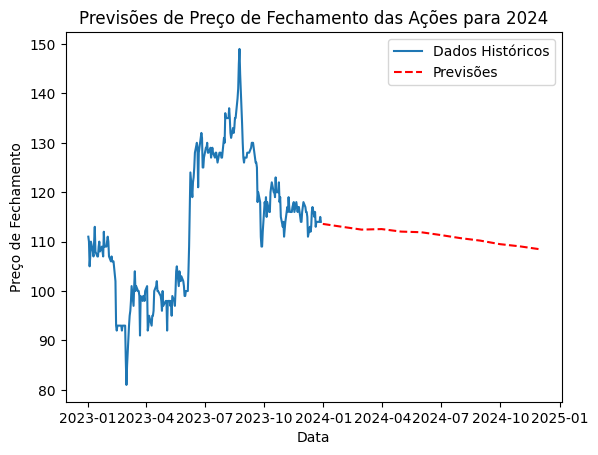

In [45]:
import matplotlib.pyplot as plt

# Define os nomes das colunas e as larguras de cada campo
colspecs = [(2, 10), (10, 22), (56, 69), (82, 95)]
names = ['Data', 'Codigo', 'Preco_Abertura', 'Preco_Fechamento']

# Carrega o arquivo
df = pd.read_fwf('COTAHIST_A2023.TXT', colspecs=colspecs, names=names, header=None)

# Filtra pela ação VALE3, garantindo que seja exatamente VALE3 (sem caracteres adicionais)
HAGA_df = df[df['Codigo'].str.endswith('HAGA4')]

# Convertendo a coluna 'Data' para datetime
HAGA_df['Data'] = pd.to_datetime(HAGA_df['Data'], format='%Y%m%d')

# Ajustando o modelo ARIMA aos dados históricos de 2022 e 2023
modelo_arima = ARIMA(HAGA_df['Preco_Fechamento'], order=(9,3,0))
modelo_ajustado = modelo_arima.fit()

# Fazendo previsões para 2024
previsoes = modelo_ajustado.forecast(steps=12)  # Previsão para os próximos 12 meses de 2024

# Plotando os dados históricos
plt.plot(HAGA_df['Data'], HAGA_df['Preco_Fechamento'], label='Dados Históricos')

# Plotando as previsões
ultimo_dia_historico = HAGA_df['Data'].iloc[-1]
proximo_dia = ultimo_dia_historico + pd.Timedelta(days=1)
datas_previsao = pd.date_range(start=proximo_dia, periods=12, freq='M')
plt.plot(datas_previsao, previsoes, color='red', linestyle='--', label='Previsões')

# Configurando o título e legendas
plt.title('Previsões de Preço de Fechamento das Ações para 2024')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()

# Exibindo o gráfico
plt.show()
